# **Task definition**
Build a supervised machine learning model that predicts student post-test scores.

Training data contains information about a test written by some students. It includes features such as school, its location and type, classroom type, teaching method, number of students in a class, student id, gender, information about lunch subsidies, and pre-test scores. 

In [3]:
# import general  libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data exploration and cleaning**

In [5]:
# load data
data = pd.read_csv('test_scores.csv')

Let's take a look at general information about the data we have.

In [6]:
# print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
# print first rows
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [5]:
# print number of unique values for each column
data_df = pd.DataFrame(data)
print(data_df.nunique())

school               23
school_setting        3
school_type           2
classroom            97
teaching_method       2
n_student            18
student_id         2133
gender                2
lunch                 2
pretest              69
posttest             68
dtype: int64


In [6]:
# print unique values for each column
for col in data_df:
    print(data_df[col].unique())

['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
['Urban' 'Suburban' 'Rural']
['Non-public' 'Public']
['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH']
['Standard' 'Experimental']
[20. 21. 18. 15. 16. 19. 17. 28. 27. 24. 14. 22. 23. 31. 25. 26. 29. 30.]
['2FHT3' '3JIVH' '3XOWE' ... 'YDR1Z' 'YUEIH' 'ZVCQ8']
['Female' '

The data appears to be clean, all values are present. However, *`student_id`* column can be removed, since it doesn't provide any useful information for prediction.

In [7]:
# remove unnecessary column
data.drop(['student_id'], axis = 1, inplace = True)

Now, let's take a closer look at the dataset content. \
\
We can start by plotting a kernel density estimate (KDE) to visualize the distribution of target *`posttest`* values.

In [8]:
# get descriptive information about posttest feature values
des = data['posttest'].describe()
print(des)

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64


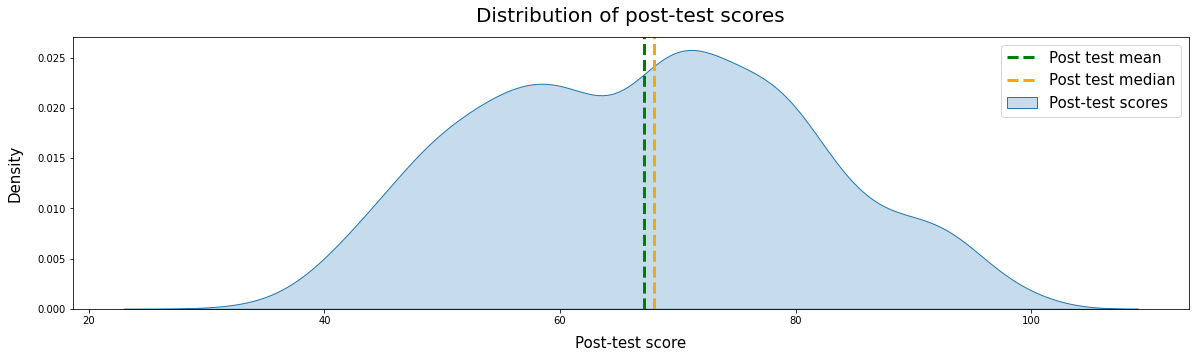

In [9]:
# plot KDE
plt.figure(figsize=(20,5))
sns.kdeplot(data=data['posttest'], shade=True, label='Post-test scores')

# plot mean and median values
plt.axvline(x=des['mean'], linestyle='--', lw=3, color='green', label='Post test mean')
plt.axvline(x=des['50%'], linestyle='--', lw=3, color='orange', label='Post test median')

# cosmetic tweaks
plt.title('Distribution of post-test scores', fontdict={'fontsize': 20}, pad=15)
plt.xlabel("Post-test score", fontdict={'fontsize': 15}, labelpad=10)
plt.ylabel("Density", fontdict={'fontsize': 15}, labelpad=15)
plt.legend(prop={'size': 15})
plt.show()

We can also look at scatter plots to observe if there is a correlation between *`posttest`* target and other numerical features, such as *`pretest`* and *`n_student`*.

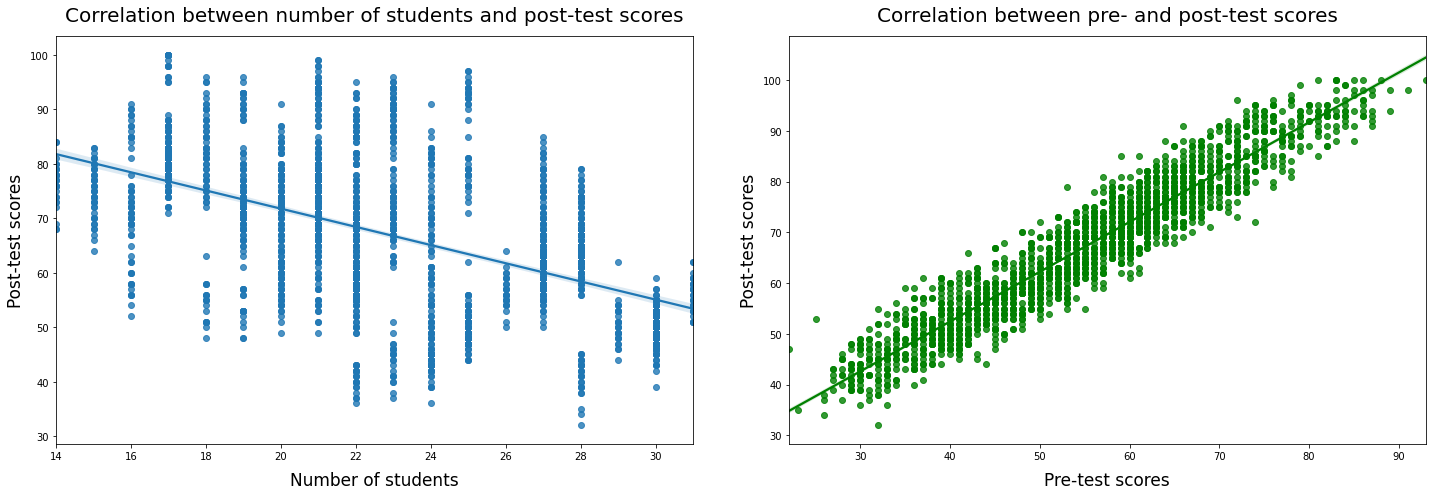

In [10]:
# plot scatter plots with fit lines
fig, axes = plt.subplots(1, 2,figsize=(20,7))
sns.regplot(data=data, x="n_student", y="posttest", ax=axes[0])
sns.regplot(data=data, x="pretest", y="posttest", color='green', ax=axes[1])

# cosmetic tweaks
axes[0].set_title('Correlation between number of students and post-test scores', size=20, pad=15)
axes[0].set_xlabel('Number of students', fontsize=17, labelpad=10)
axes[0].set_ylabel('Post-test scores', fontsize=17, labelpad=5)
axes[1].set_title('Correlation between pre- and post-test scores', size=20, pad=15)
axes[1].set_xlabel('Pre-test scores', fontsize=17, labelpad=10)
axes[1].set_ylabel('Post-test scores', fontsize=17, labelpad=5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

In [11]:
import scipy

# compute Pearson correlation between number of students in the class and post-test scores
cor = scipy.stats.pearsonr(data['n_student'], data['posttest'])
print('Correlation for number of students:', cor)

# compute Pearson correlation between pre- and post-test scores
cor = scipy.stats.pearsonr(data['pretest'], data['posttest'])
print('Correlation for pre-test scores:', cor)

Correlation for number of students: (-0.5048864411228166, 2.355155642360991e-138)
Correlation for pre-test scores: (0.9508842857175767, 0.0)


As expected, pre-test scores strongly correlate with post-test scores. However, a number of students in the class and post-test scores exhibit only a moderate negative correlation. 

Now, let's examine post-test scores for categorical features. The feature *`classroom`* has too many unique categories to be visualized in a form appealing to the human eye. But we can visualize all other features, starting with *`school`*.

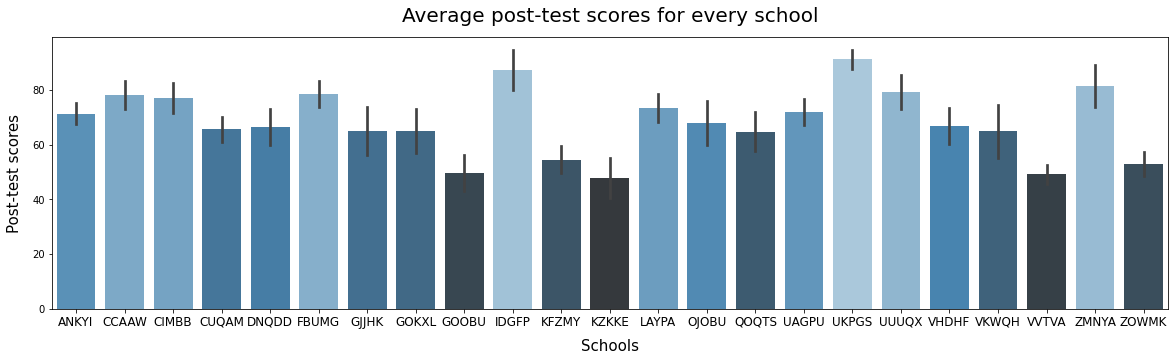

In [12]:
# compute ranks for a color palette to color bars according to an average post-test score for the school
posttest_mean = data_df.groupby('school', as_index=False)['posttest'].mean()['posttest']
pal = sns.color_palette("Blues_d", len(posttest_mean))
rank = posttest_mean.argsort().argsort()

# plot a bar plot
plt.figure(figsize=(20,5))
sns.barplot(data=data, x='school', y='posttest', estimator=np.mean, ci="sd", palette=np.array(pal[::-1])[rank])

# cosmetic tweaks
plt.title('Average post-test scores for every school', fontdict={'fontsize': 20}, pad=15)
plt.xlabel("Schools", fontdict={'fontsize': 15}, labelpad=10)
plt.ylabel("Post-test scores", fontdict={'fontsize': 15}, labelpad=10)
plt.xticks(fontsize=12)
plt.show()

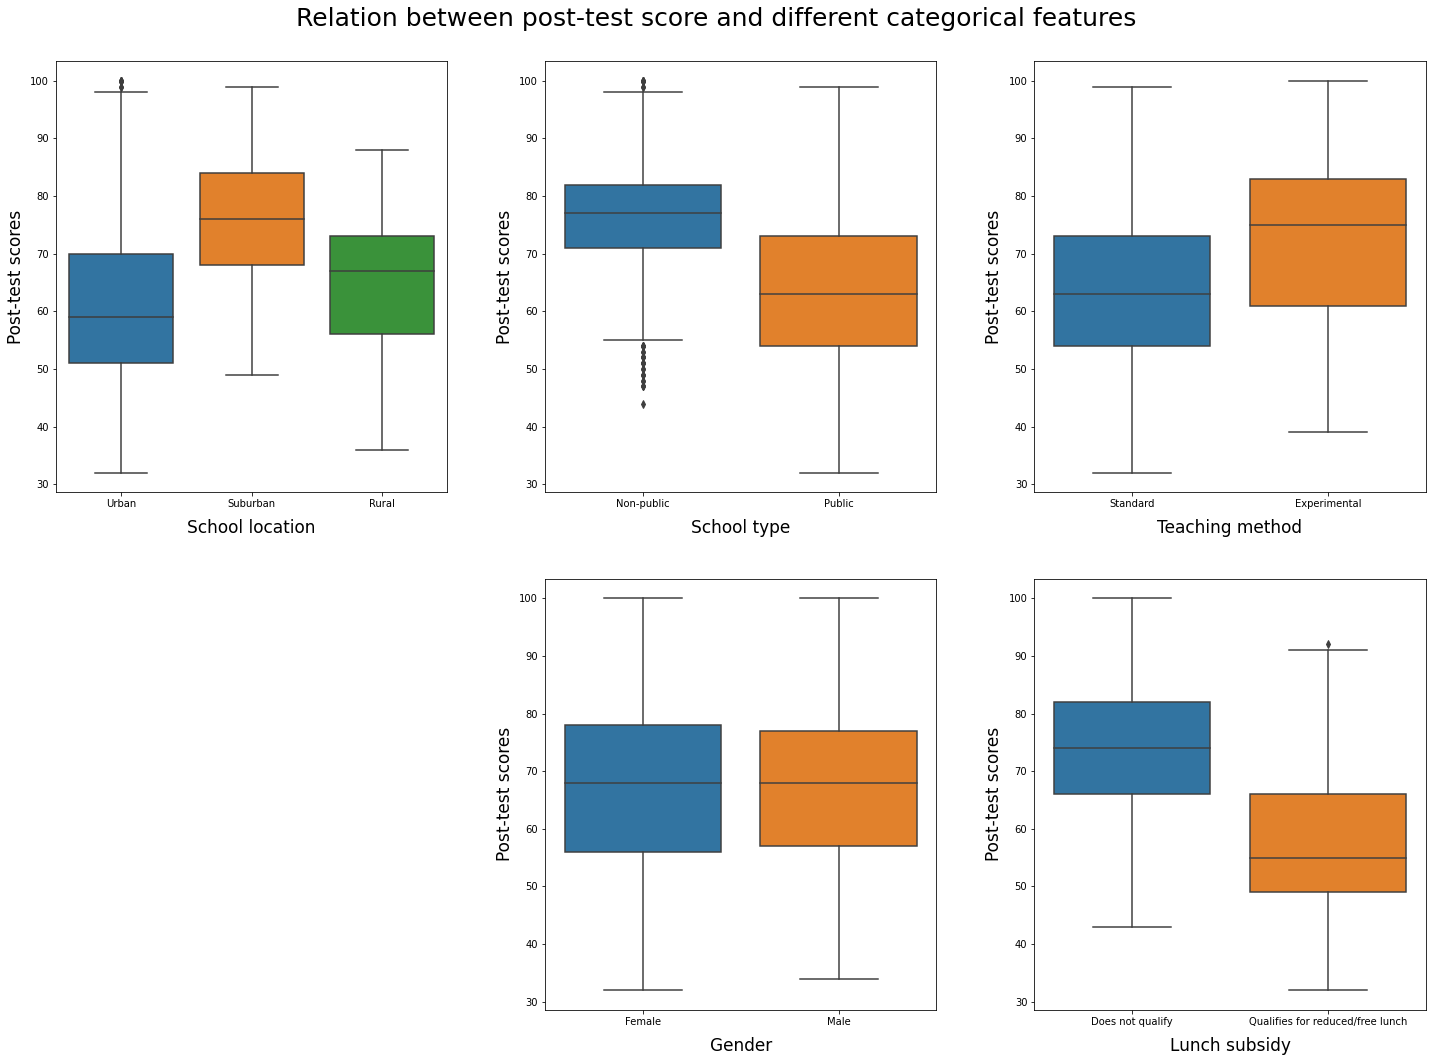

In [11]:
# plot multiple subplots for categorical features showing their influence on post-test score
fig, axes = plt.subplots(2, 3,figsize=(20,15))
sns.boxplot(data=data, x='school_setting', y='posttest', ax=axes[0,0])
sns.boxplot(data=data, x='school_type', y='posttest', ax=axes[0,1])
sns.boxplot(data=data, x='teaching_method', y='posttest', ax=axes[0,2])
sns.boxplot(data=data, x='gender', y='posttest', ax=axes[1,1])
sns.boxplot(data=data, x='lunch', y='posttest', ax=axes[1,2])

# cosmetic tweaks
fig.suptitle('Relation between post-test score and different categorical features', fontsize=25)
xlables = [['School location', 'School type', 'Teaching method'], ['', 'Gender', 'Lunch subsidy']]
for i, row in enumerate(axes):
    for j, cell in enumerate(row):
        cell.set_xlabel(xlabel=xlables[i][j], fontsize=17, labelpad=10)
        cell.set_ylabel(ylabel='Post-test scores', fontsize=17, labelpad=5)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
fig.delaxes(axes[1,0])
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.93)
plt.show()

We can see from the plots that post-test scores differ for different categories of every feature except *`gender`*. Thus, if necessary, it is possible to test a subset of features that does not contain *`gender`*.

# **Data preparation**

The next step is to prepare data for further manipulations by machine learning models.

In [14]:
# import necessary methods
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# set seed for results replication
np.random.seed(0)

# split data into features and labels
X = data.drop('posttest', axis = 1)
y = data['posttest']

# convert categorical values to ordinal
categorical = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']
ct = ColumnTransformer([('cat', OrdinalEncoder(), categorical)], remainder = 'passthrough')
X_ = ct.fit_transform(X)

# standirdize data values 
scaler = StandardScaler()
X_ = scaler.fit_transform(X_)

# split data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)

# **Computation of regression models**

In [15]:
# import methods for grid search in hyper-parameter space
from sklearn.model_selection import GridSearchCV

# create containers to store all models and their R2 scores on validation data
models = dict()
scores = dict()

Several regression models can be applied for the task at hand. Let's try out different models and compare them using the R2 metric. At this stage, the R2 score will be computed either on validation data alone or on a combination of training and validation data, depending on the model. The models will have no access to testing data.

## **Linear Regression**

In [16]:
# import Linear Regressor
from sklearn.linear_model import LinearRegression

# train (compute a model)
model = LinearRegression().fit(X_train, y_train)

# evaluate the model
score = model.score(X_val, y_val)
print(score)

# store the model and its score
models['LR'] = model
scores['LR'] = score

0.9407034367449334


## **Support Vector Machine**

In [17]:
# import Support Vector Machine regressor
from sklearn import svm

# define a model and its parameters for grid search
params = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'])
gs = GridSearchCV(svm.SVR(), params)

# train multiple models by performing grid search on provided parameters
search = gs.fit(X_train_val, y_train_val)

# display best parameters and a corresponding score
print(search.best_params_)
print(search.best_score_)

# store best model and its score
models['SVM'] = search.best_estimator_
scores['SVM'] = search.best_score_

{'kernel': 'linear'}
0.9474671209151884


## **K-Nearest Neighbors**

In [18]:
# import K-Nearest Neighbors regressor
from sklearn.neighbors import KNeighborsRegressor

# define a model and its parameters for grid search
params = dict(n_neighbors=[3, 5, 9], weights=['uniform', 'distance'])
gs = GridSearchCV(KNeighborsRegressor(), params)

# train multiple models by performing grid search on provided parameters
search = gs.fit(X_train_val, y_train_val)

# display best parameters and a corresponding score
print(search.best_params_)
print(search.best_score_)

# store best model and its score
models['KNN'] = search.best_estimator_
scores['KNN'] = search.best_score_

{'n_neighbors': 5, 'weights': 'uniform'}
0.9305599264190768


## **Random Forests**

In [19]:
# import Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

# define a model and its parameters for grid search
params = dict(n_estimators=[20, 50, 100, 500], max_depth=[10, 50, 100, None])
gs = GridSearchCV(RandomForestRegressor(), params)

# train multiple models by performing grid search on provided parameters
search = gs.fit(X_train_val, y_train_val)

# display best parameters and a corresponding score
print(search.best_params_)
print(search.best_score_)

# store best model and its score
models['RF'] = search.best_estimator_
scores['RF'] = search.best_score_

{'max_depth': 10, 'n_estimators': 500}
0.94681387811251


## **Multi-Layer Perceptron**

In [23]:
# import Multi-Layer Perceptron regressor
from sklearn.neural_network import MLPRegressor

# define a model and its parameters for grid search
params = dict(hidden_layer_sizes=[10, 50, 100], activation=['logistic', 'tanh', 'relu'])
gs = GridSearchCV(MLPRegressor(max_iter=5000, solver='sgd'), params)

# train multiple models by performing grid search on provided parameters
search = gs.fit(X_train_val, y_train_val)

# display best parameters and a corresponding score
print(search.best_params_)
print(search.best_score_)

# store best model and its score
models['MLP'] = search.best_estimator_
scores['MLP'] = search.best_score_

{'activation': 'logistic', 'hidden_layer_sizes': 10}
0.9500379217289832


## **Deep Neural Network**

In [21]:
# import Keras Deep Neural Network models and layers 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

# build a model
model = Sequential()
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs = 100, verbose=0)

# evaluate the model
score = r2_score(y_val, model.predict(X_val))
print(score)

# store best model and its score
models['DNN'] = model
scores['DNN'] = score

0.926525914782138


# **Best model selection**

Finally, let's choose the model that yields the best R2 score on training/validation data. The performance of that model will be then evaluated on testing data to get final results.

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# fetch model with the best R2 score on training/validation data
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

# make predictions
y_pred_train_val = best_model.predict(X_train_val)
y_pred_test = best_model.predict(X_test)

# evaluate predictions and print results
print('Best model: ', best_model_name, '\n')
print('--- Results on training + validation data ---')
print('R2: ', r2_score(y_train_val,y_pred_train_val))
print('MAE: ', mean_absolute_error(y_train_val,y_pred_train_val))
print('MSE: ', mean_squared_error(y_train_val,y_pred_train_val))
print()
print('--- Final results on testing data ---')
print('R2: ', r2_score(y_test,y_pred_test))
print('MAE: ', mean_absolute_error(y_test,y_pred_test))
print('MSE: ', mean_squared_error(y_test,y_pred_test))

Best model:  MLP 

--- Results on training + validation data ---
R2:  0.9540471741041774
MAE:  2.3831167430865245
MSE:  9.050099640315407

--- Final results on testing data ---
R2:  0.9436448556858967
MAE:  2.6334757672282425
MSE:  10.700004364492418


# **Conclusion & Discussion**

Several regression models were proposed. The demonstrated results are encouraging but leave room for improvement. 

With more time to tackle this task, the following improvements could be made. 
1. Alternative types of input data encoding can be tested, together with feature space transformation techniques, such as *discriminant correspondence analysis* suitable for categorical features.
   
2. Although a brief grid search on hyper-parameters was performed for some models, a more thorough search has to be carried out to find optimal hyper-parameters and fine-tune the models. Iterative models could also be trained for a greater number of iterations to avoid convergence problems and to get closer to an optimal solution.
   
3. A deeper analysis of the results has to be done. For example, to display and examine occurrences, in which the error between the target and the prediction is high. It is also necessary to perform a sanity check and make sure the data is formatted in the right manner, and the model is working in the way it supposes to. 
   
4. Finally, the code itself can be improved. Repetitive code blocks with similar functionality can be grouped into functions. Additional formatting of the output is also necessary to provide more clarity for an external user.